In [1]:
from keras.utils import to_categorical #for one-hot encoding of categorical labels
import numpy as np #for numerical computations 
import pandas as pd #for data manipulation 
from sklearn.model_selection import train_test_split #for splitting data into training and testing sets
import keras
from keras.models import Sequential # for creating sequential neural network models
from keras.layers import Dense, Dropout, Flatten #for various neural network layer types
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam #for training neural networks

In [2]:
#loading  training dataset
testD = pd.read_csv("C:\\Users\\MANUH\\Desktop\\fashion-mnist_train.csv")

#loading testing dataset
trainD = pd.read_csv("C:\\Users\MANUH\\Desktop\\fashion-mnist_test.csv")

In [3]:
# Reshape input data 
input_shape = (28, 28, 1)

# Load training data features from column 1 onwards
X = np.array(trainD.iloc[:, 1:])

# Convert training labels to one-hot encoded vectors
y = to_categorical(np.array(trainD.iloc[:, 0]))

# Load testing data features from column 1 onwards
X_test = np.array(testD.iloc[:, 1:])

# Reshape testing data for compatibility with the model
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255


In [4]:
# Split data into training and validation sets (70% training, 30% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Reshape training data for compatibility with the model 
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255

# Reshape validation data for compatibility with the model
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1).astype('float32') / 255

# Load testing data features from column 1 onwards 
X_test = np.array(testD.iloc[:, 1:])

# Reshape testing data for compatibility with the model 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

# Hyperparameters for training:
batch_size = 256  # Number of samples processed before updating weights
numClasses = 10    # Number of output classes (assuming 10 categories)
epochs = 50        # Number of times to iterate through the entire training dataset


In [5]:
# Create a sequential neural network model
model = Sequential()

# First convolutional layer:
#   - 32 filters of size 3x3
#   - ReLU activation function
#   - He normal initialization for weights (recommended for ReLU)
#   - Input shape specified by input_shape (assuming 28x28 pixels and 1 channel)
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', input_shape=input_shape))

# Max pooling layer: reduces dimensionality by 2x2
model.add(MaxPooling2D((2, 2)))

# Dropout layer: randomly drops 25% of activations during training to prevent overfitting
model.add(Dropout(0.25))

# Second convolutional layer:
#   - 64 filters of size 3x3
#   - ReLU activation function
model.add(Conv2D(64, (3, 3), activation='relu'))

# Max pooling layer: reduces dimensionality by 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Dropout layer: randomly drops 25% of activations during training to prevent overfitting
model.add(Dropout(0.25))

# Third convolutional layer:
#   - 128 filters of size 3x3
#   - ReLU activation function
model.add(Conv2D(128, (3, 3), activation='relu'))

# Dropout layer: randomly drops 40% of activations during training to prevent overfitting
model.add(Dropout(0.4))

# Flatten layer: transforms the multi-dimensional tensor into a vector for dense layers
model.add(Flatten())

# Dense layer (fully-connected):
#   - 128 neurons
#   - ReLU activation function
model.add(Dense(128, activation='relu'))

# Dropout layer: randomly drops 30% of activations during training to prevent overfitting
model.add(Dropout(0.3))

# Output layer (dense layer):
#   - Number of neurons equal to the number of classes (numClasses)
#   - Softmax activation for probability distribution of class outputs
model.add(Dense(numClasses, activation='softmax'))



In [6]:
# Print a summary of the model architecture
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [7]:
# Compile the model with Adam optimizer
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])

# Train the model
fit=model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_val, y_val))


Epoch 1/50


28/28 [==============================] - 6s 123ms/step - loss: 1.6781 - accuracy: 0.3813 - val_loss: 0.9879 - val_accuracy: 0.6920
Epoch 2/50
28/28 [==============================] - 3s 112ms/step - loss: 0.9076 - accuracy: 0.6601 - val_loss: 0.6980 - val_accuracy: 0.7563
Epoch 3/50
28/28 [==============================] - 3s 112ms/step - loss: 0.7348 - accuracy: 0.7243 - val_loss: 0.6214 - val_accuracy: 0.7803
Epoch 4/50
28/28 [==============================] - 3s 112ms/step - loss: 0.6690 - accuracy: 0.7504 - val_loss: 0.5692 - val_accuracy: 0.7923
Epoch 5/50
28/28 [==============================] - 3s 118ms/step - loss: 0.6224 - accuracy: 0.7673 - val_loss: 0.5490 - val_accuracy: 0.8043
Epoch 6/50
28/28 [==============================] - 3s 115ms/step - loss: 0.5890 - accuracy: 0.7831 - val_loss: 0.5149 - val_accuracy: 0.8103
Epoch 7/50
28/28 [==============================] - 3s 119ms/step - loss: 0.5640 - accuracy: 0.7884 - val_loss: 0.5042 - val_accuracy: 0.8180
Epoc

In [8]:
# Evaluate the model
score = model.evaluate(X_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.31591787934303284
Test accuracy: 0.8880000114440918


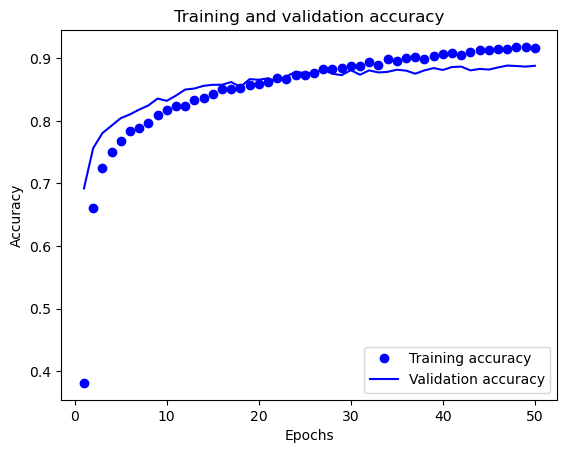

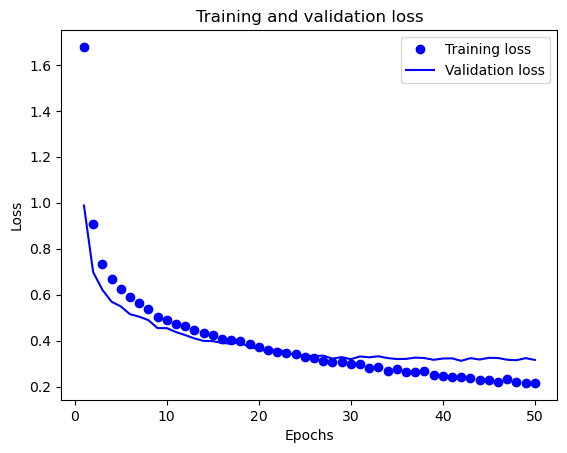

In [9]:
import matplotlib.pyplot as plt
accuracy = fit.history['accuracy'] 
val_accuracy = fit.history['val_accuracy']  
loss = fit.history['loss']
val_loss = fit.history['val_loss']
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1875/1875 [==============================] - 10s 5ms/step


C:\Users\MANUH\AppData\Local\Temp\ipykernel_10496\1922114682.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\MANUH\AppData\Local\Temp\ipykernel_10496\1922114682.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 3, i+1)


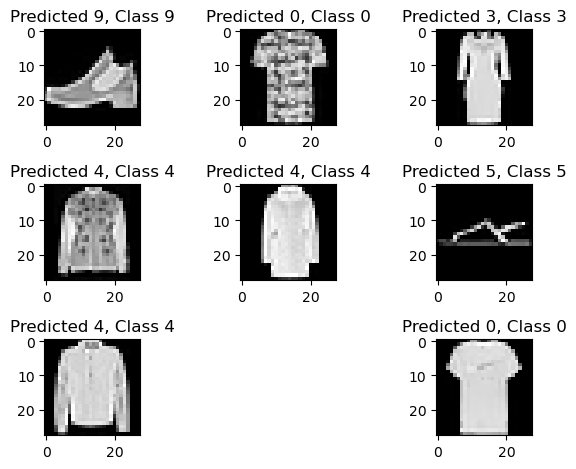

In [10]:
#making prediction out of testing dataset
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
y_true = testD.iloc[:, 0]
correct_indices = np.nonzero(predicted_classes == y_true)[0]
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[correct].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_true[correct]))
    plt.tight_layout()

plt.show()